In [2]:
import pandas as pd

# Define column names for train data
train_columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']

# Read train.txt into pandas dataframe
train_df = pd.read_csv('train_data.txt', delimiter=':::', header=None, names=train_columns, engine='python')

# Define column names for test data
test_columns = ['ID', 'TITLE', 'DESCRIPTION']

# Read test.txt into pandas dataframe
test_df = pd.read_csv('test_data.txt', delimiter=':::', header=None, names=test_columns, engine='python')

# Display the first few rows of each dataframe
print("Train data:")
print(train_df.head())

print("\nTest data:")
print(test_df.head())



Train data:
   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  

Test data:
   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         DESCRIPTION  
0   L.R

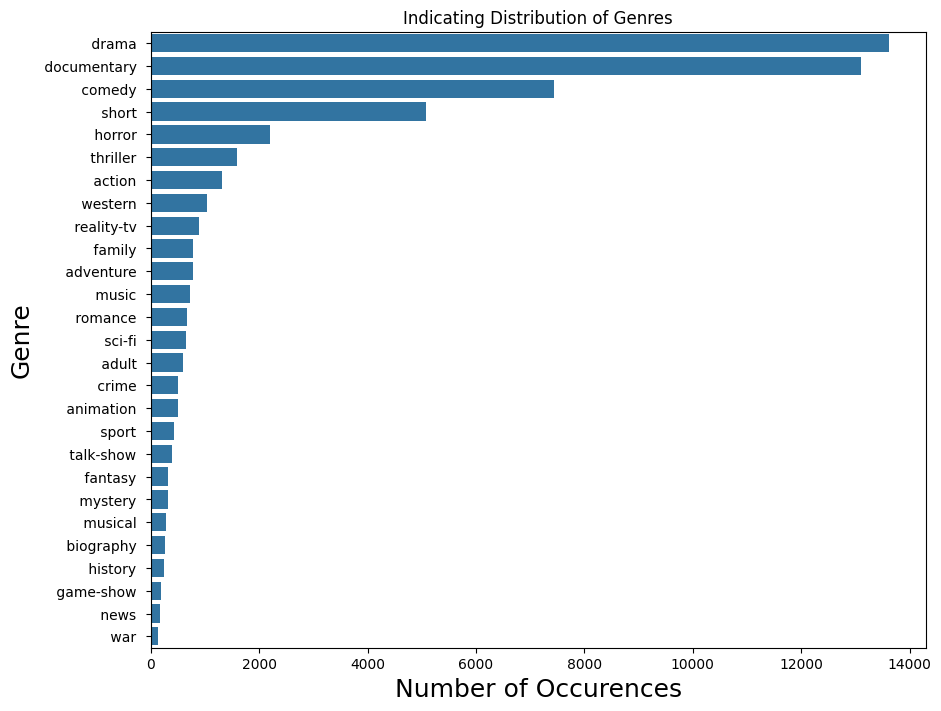

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.countplot(y='GENRE',data=train_df,order=train_df['GENRE'].value_counts().index)
plt.title('Indicating Distribution of Genres')
plt.xlabel('Number of Occurences',fontsize=18)
plt.ylabel('Genre',fontsize=18)
plt.show()

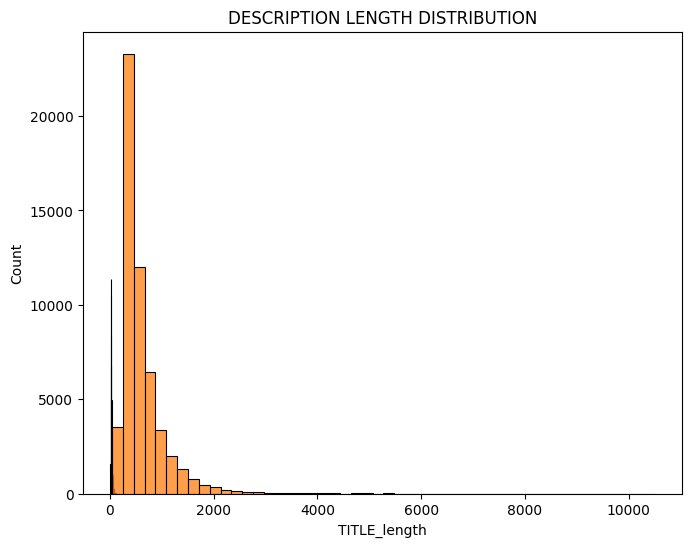

In [4]:
train_df['TITLE_length']=train_df['TITLE'].apply(len)
train_df['DESCRIPTION_length']=train_df['DESCRIPTION'].apply(len)
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.histplot(train_df['TITLE_length'],bins=50)
plt.title('TITLE LENGTH DISTRIBUTION')

plt.subplot(1,2,1)
sns.histplot(train_df['DESCRIPTION_length'],bins=50)
plt.title('DESCRIPTION LENGTH DISTRIBUTION')

plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Assuming df_train_data is your DataFrame containing the training data
# X_train_data contains the features (input variables) and y_train_data contains the target variable (output variable)
# Adjust the column names accordingly based on your dataset

# Splitting the data into features (X) and target variable (y)
X = train_df.drop(columns=['GENRE'])  # Assuming 'Genre' is the target variable
y = train_df['GENRE']

# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and validation sets to verify the split
print("Training set - X:", X_train.shape, " y:", y_train.shape)
print("Validation set - X:", X_val.shape, " y:", y_val.shape)
print(X_train.head())

Training set - X: (43371, 5)  y: (43371,)
Validation set - X: (10843, 5)  y: (10843,)
          ID                                              TITLE  \
19253  19254                                    "Shade" (????)    
12261  12262                                  Scarecrow (2016)    
37143  37144   Larry Wilmore's Race, Religion & Sex in Flori...   
21965  21966                              Dear Mr. Gore (2009)    
7033    7034                              "Reinikainen" (1982)    

                                             DESCRIPTION  TITLE_length  \
19253   Sex. Betrayal. Seduction. Manipulation. Addic...            16   
12261   Autistic teen, Tony and his friendship with C...            18   
37143   The one-hour special examines this socially, ...            56   
21965   This personal narrative documentary uses my b...            22   
7033    The easy-going village policeman Artturi Saka...            22   

       DESCRIPTION_length  
19253                 514  
12261     

In [6]:
print(X_train.shape)

(43371, 5)


In [7]:
print(X_val.shape)

(10843, 5)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your DataFrame name is train_df and it contains a 'DESCRIPTION' column
corpus = train_df['DESCRIPTION'].tolist()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to create the TF-IDF representation
X = tfidf_vectorizer.fit_transform(corpus)

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (54214, 121110)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming your DataFrame name is train_df and it contains a 'DESCRIPTION' column
corpus = train_df['DESCRIPTION'].tolist()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to create the TF-IDF representation
X = tfidf_vectorizer.fit_transform(corpus)

# Assuming df_train_data is your DataFrame containing the training data
# X contains the TF-IDF features and y contains the target variable
X_train, X_val, y_train, y_val = train_test_split(X, train_df['GENRE'], test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the validation data
y_pred = logistic_regression.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.5903347781979157


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

# Predict on the validation data
y_pred = naive_bayes.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(" Naive Baiyes Accuracy:", accuracy)


 Naive Baiyes Accuracy: 0.44507977497002676


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define subset size (adjust as needed)
subset_size = 10000

# Initialize SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the classifier on a subset of the training data
svm_classifier.fit(X_train[:subset_size], y_train[:subset_size])

# Predict on the validation data
y_pred = svm_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(" SVM Accuracy:", accuracy)


 SVM Accuracy: 0.5438531771649913


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier with some parameters
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on a subset of the training data
subset_size = 10000 # Adjust this value based on your dataset size
random_forest.fit(X_train[:subset_size], y_train[:subset_size])

# Predict on the validation data
y_pred = random_forest.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Random Forest Accuracy:", accuracy)



Random Forest Accuracy: 0.4308770635432998


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize Gradient Boosting classifier with optimized parameters
gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)

# Train the classifier on a subset of the training data
subset_size = 1000# Adjust this value based on your dataset size
gradient_boosting.fit(X_train[:subset_size], y_train[:subset_size])

# Predict on the validation data
y_pred = gradient_boosting.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Gradient Boosting Accuracy:", accuracy)


Gradient Boosting Accuracy: 0.3863321958867472


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the validation data
y_pred = knn_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.4157520981278244


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Predict on the validation data
y_pred = decision_tree.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.3469519505671862


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Read the data
train_df = pd.read_csv('train_data.txt', delimiter=':::', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

# Step 1: Text Length
train_df['TEXT_LENGTH'] = train_df['DESCRIPTION'].apply(len)

# Step 2: Word Count
train_df['WORD_COUNT'] = train_df['DESCRIPTION'].apply(lambda x: len(x.split()))

# Step 3: TF-IDF Encoding
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_df['DESCRIPTION'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, train_df['GENRE'], test_size=0.2, random_state=42)

# Display the first few rows of the modified dataframe
print(train_df.head())


   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  TEXT_LENGTH  WORD_COUNT  
0   Listening in to a conversation between his do...          546          92  
1   A brother and sister with a past incestuous r...          184          32  
2   As the bus empties the students for their fie...          650         114  
3   To help their unemployed father make ends mee...         1082         192  
4   The film's title refers not only to the un-re...          625         106  


In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier on the training data (X_train with additional features, y_train)
logistic_regression.fit(X_train, y_train)

# Predict on the validation data (X_val with additional features)
y_pred = logistic_regression.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Logistic Regression Accuracy with Feature Engineering:", accuracy)


Logistic Regression Accuracy with Feature Engineering: 0.5903347781979157


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Display basic properties of the data
print("Train data summary:")
print(train_df.info())




Train data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
 4   TEXT_LENGTH  54214 non-null  int64 
 5   WORD_COUNT   54214 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ MB
None


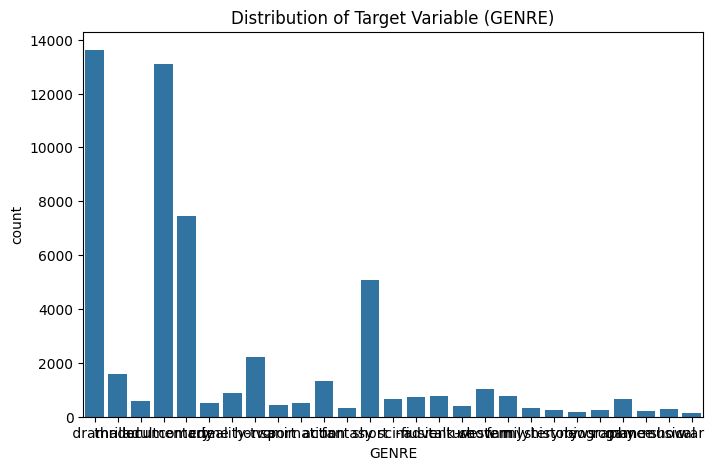

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='GENRE', data=train_df)
plt.title('Distribution of Target Variable (GENRE)')
plt.show()


count                                                    10
unique                                                   10
top        Listening in to a conversation between his do...
freq                                                      1
Name: DESCRIPTION, dtype: object


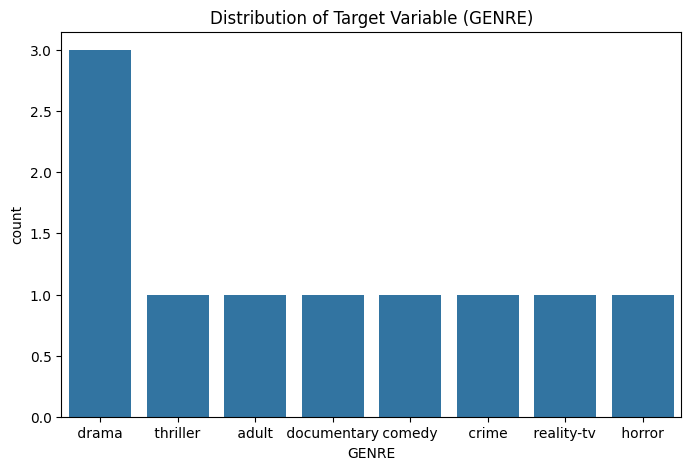

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a subset of the data for visualization (e.g., first 1000 rows)
subset_train_df = train_df.head(10)

# Calculate summary statistics for the DESCRIPTION column
description_summary = subset_train_df['DESCRIPTION'].describe()

# Print summary statistics
print(description_summary)

# Visualize the distribution of the target variable (GENRE)
plt.figure(figsize=(8, 5))
sns.countplot(x='GENRE', data=subset_train_df)
plt.title('Distribution of Target Variable (GENRE)')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the validation set
y_pred = logistic_regression.predict(X_val)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

      action        0.61      0.24      0.34       263
       adult        0.91      0.19      0.31       112
   adventure        0.47      0.12      0.18       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.54      0.60      0.57      1443
       crime        0.33      0.01      0.02       107
 documentary        0.65      0.88      0.75      2659
       drama        0.54      0.81      0.65      2697
      family        0.56      0.06      0.11       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.40      0.56        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.57      0.62       431
       music        0.67      0.40      0.50       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [23]:
import numpy as np

# Get the coefficients of the logistic regression model
coefficients = logistic_regression.coef_[0]

# Get feature names from the TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the top coefficients
print("Top positive coefficients:")
print(coefficients_df.head(10))

print("\nTop negative coefficients:")
print(coefficients_df.tail(10))


Top positive coefficients:
        Feature  Coefficient
2507     action     4.156219
38392     fight     4.116450
66847   martial     3.816395
82988    police     3.424722
90252   revenge     2.975539
25070     crime     2.868042
58170    killed     2.851882
115905       vs     2.850200
3269    against     2.711332
106574     team     2.710087

Top negative coefficients:
            Feature  Coefficient
49789           how    -1.310452
20064      children    -1.358833
30584   documentary    -1.369865
51617            in    -1.396961
48023           her    -1.408256
72604         music    -1.412527
119261         year    -1.575869
49727         house    -1.693554
116772           we    -2.005479
97872          show    -2.044320


In [24]:
test_columns = ['ID', 'TITLE', 'DESCRIPTION']
test_df = pd.read_csv('test_data.txt', delimiter=':::', header=None, names=test_columns, engine='python')
test_df.head()


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [25]:
# Assuming you have already trained your TfidfVectorizer and stored it in tfidf_vectorizer

# Vectorize the test data using the trained TfidfVectorizer
X_test_vectorized = tfidf_vectorizer.transform(test_df['DESCRIPTION'])

# Now your test data is ready for prediction


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier with increased max_iter
logistic_regression = LogisticRegression()

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the test data
y_pred_test = logistic_regression.predict(X_test_vectorized)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
y_pred_test

array([' comedy ', ' drama ', ' documentary ', ..., ' comedy ', ' drama ',
       ' documentary '], dtype=object)